In [1]:
# Load the data
import os
from sklearn import preprocessing, metrics

# Parameters
do_grid_search_cv = True
do_pca = False
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the CSV file and convert "?" to NaN

original_data = pd.read_csv('C:/Users/Mirela/PycharmProjects/Covid_19/covid_19_clean_complete.csv',
                            names=['Province/State','Country/Region','Lat','Long','Date','Confirmed','Deaths','Recovered'
], sep=r'\s*,\s*',
                            engine='python',
                            na_values="?")

print(original_data.head())
print(original_data.dtypes)

print(original_data.isna().sum())
original_data = original_data.dropna()
print(original_data.head())



   Province/State  Country/Region      Lat     Long     Date  Confirmed  \
0  Province/State  Country/Region      Lat     Long     Date  Confirmed   
1             NaN     Afghanistan     33.0     65.0  1/22/20          0   
2             NaN         Albania  41.1533  20.1683  1/22/20          0   
3             NaN         Algeria  28.0339   1.6596  1/22/20          0   
4             NaN         Andorra  42.5063   1.5218  1/22/20          0   

   Deaths  Recovered  
0  Deaths  Recovered  
1       0          0  
2       0          0  
3       0          0  
4       0          0  
Province/State    object
Country/Region    object
Lat               object
Long              object
Date              object
Confirmed         object
Deaths            object
Recovered         object
dtype: object
Province/State    11832
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype

In [2]:
# Encode the categorical features as numbers
result = original_data.copy()
encoders = {}
for column in result.columns:

    if result.dtypes[column] == pd.np.object:
        encoders[column] = preprocessing.LabelEncoder()
        result[column] = encoders[column].fit_transform(result[column])

features = result
feature_names = features.columns.get_values()
print(features.head())

    Province/State  Country/Region  Lat  Long  Date  Confirmed  Deaths  \
0               54               3   77    78    68        682      83   
9                4               0    9    68     0          0       0   
10              46               0    7    70     0          0       0   
11              49               0    0    64     0          0       0   
12              57               0    5    71     0          0       0   

    Recovered  
0         605  
9           0  
10          0  
11          0  
12          0  


In [3]:
# Labels are the values we want to predict
labels = np.array(features['Country/Region']) # Create an array.

# Remove the labels from the features
# axis 1 refers to the columns

features = features.drop('Country/Region', axis=1) #  Remove columns by specifying label names and coresponding axis

In [6]:
# data normalization
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
features = normalizer.fit_transform(features)

In [7]:
# Using Skicit-learn to split data into training and testing sets

from sklearn.model_selection import train_test_split

# Split data into random train and test subsets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3,
                                                                            random_state=42)
# returns list containing train-test split of inputs.

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3713, 7)
Training Labels Shape: (3713,)
Testing Features Shape: (1592, 7)
Testing Labels Shape: (1592,)


In [8]:
num_classes = np.max(train_labels) + 1
print(num_classes, 'classes')

8 classes


In [10]:
import os
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn import preprocessing, metrics

input_dimensions = train_features.shape[1]
optimizer = 'rmsprop'
dropout = 0.05
model = Sequential()
inner_nodes = int(input_dimensions / 2)

model.add(Dense(inner_nodes, kernel_initializer='uniform', activation='relu', input_dim=input_dimensions))
model.add(Dropout(rate=dropout))
model.add(Dense(inner_nodes, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate=dropout))
model.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])


In [11]:
model.summary()

example_batch = train_features[:15]
example_result = model.predict(example_batch)#Generates output predictions for the input samples.
print(example_result)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 24        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
dropout_2 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 32        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________
[[0.12500331 0.1249878  0.12499991 0.12500173 0.12500486 0.12501216
  0.12500061 0.12498967]
 [0.12500232 0.12499142 0.12499

In [12]:
EPOCHS = 20

history = model.fit(
  train_features, train_labels,
  epochs=EPOCHS, batch_size=512, validation_split = 0.2, verbose=0)#Trains the model for a given number of epochs (iterations on a dataset)

In [13]:
# Visualize the training progress
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

    val_loss  val_accuracy      loss  accuracy  epoch
15  2.010522      0.430686  2.014368  0.415152     15
16  2.006859      0.430686  2.010772  0.415152     16
17  2.003153      0.430686  2.007195  0.415152     17
18  1.999527      0.430686  2.003611  0.415152     18
19  1.995908      0.430686  2.000080  0.415152     19


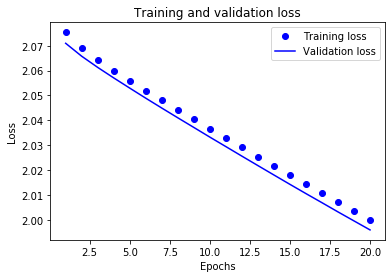

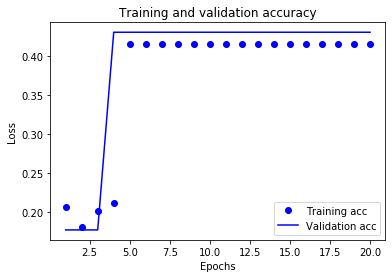

In [14]:
#Plotting the training and validation loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting the training and validation accuracy

plt.clf() 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
results = model.evaluate(test_features, test_labels)

print(results)

1592/1592 [==============================] - 0s 23us/step
[1.9954290258225484, 0.4340452253818512]


In [19]:
predictions = model.predict(test_features)


In [20]:
predictions[0].shape

(8,)

In [21]:
np.sum(predictions[0])

1.0

In [22]:
np.argmax(predictions[0])

2